In [9]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [10]:
# Save path to data set in a variable
city_file = "city_data.csv"
ride_file = "ride_data.csv" 

In [11]:
# Use Pandas to read data
city_file_pd = pd.read_csv(city_file) 
ride_file_pd = pd.read_csv(ride_file)  

In [12]:
#Create count column for ride file
ride_file_pd["Ride Count"] = 1

#Group ride file by city
ride_grouped = ride_file_pd.groupby(["city"], as_index='False')

#Sum fare and ride count columns for grouped ride file 
ride_grouped_summary = ride_grouped["fare", "Ride Count"].sum().reset_index('city')

#Add average ride fare column
ride_grouped_summary["Average Ride Fare"] = ride_grouped_summary["fare"]/ride_grouped_summary["Ride Count"]
ride_grouped_summary.head(5) 

,city,fare,Ride Count,Average Ride Fare
0,Alvarezhaven,741.79,31,23.928710
1,Alyssaberg,535.85,26,20.609615
2,Anitamouth,335.84,9,37.315556
3,Antoniomouth,519.75,22,23.625000
4,Aprilchester,417.65,19,21.981579


In [13]:
#Merge grouped ride file and city file
city_ride = pd.merge(city_file_pd, ride_grouped_summary, on="city", how="left") 

In [14]:
#Create area column for scatter plot marker size scale
city_ride["area"] = city_ride["driver_count"]**1.75 

In [15]:
#Add coloumn to hold color value for city type 
city_ride["color"] = city_ride["type"]
city_ride["color"] = city_ride["color"].replace({"Urban": "salmon", "Rural": "lemonchiffon", "Suburban": "lightblue"}) 

In [16]:
#Group city_ride file by type
type_grouped = city_ride.groupby(["type"], as_index='False')

#Sum fare and ride count columns for grouped type file 
type_grouped_summary = type_grouped["fare", "Ride Count"].sum().reset_index('type')
type_grouped_summary.head() 

,type,fare,Ride Count
0,Rural,4255.09,125
1,Suburban,20335.69,657
2,Urban,40078.34,1625


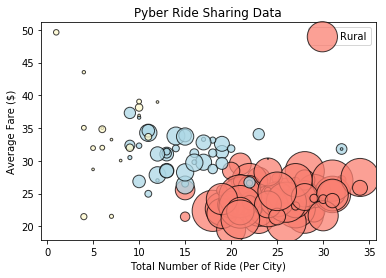

In [19]:
#Create scatter plot
plt.scatter(city_ride["Ride Count"], city_ride["Average Ride Fare"], marker ="o", c=city_ride["color"],
            edgecolors="black",s=city_ride["area"], alpha=0.75)
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Ride (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend(type_grouped_summary["type"], loc="best") 

(0, 40)

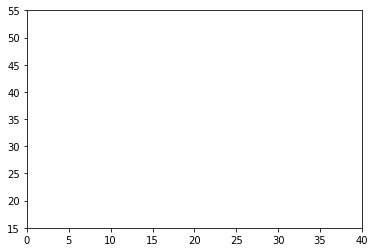

In [20]:
#Set x and y axis range
plt.ylim(15, 55)
plt.xlim(0, 40) 

In [26]:
#Set gid style
plt.style.use('ggplot') 

In [27]:
#Set size of grid
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.show() 

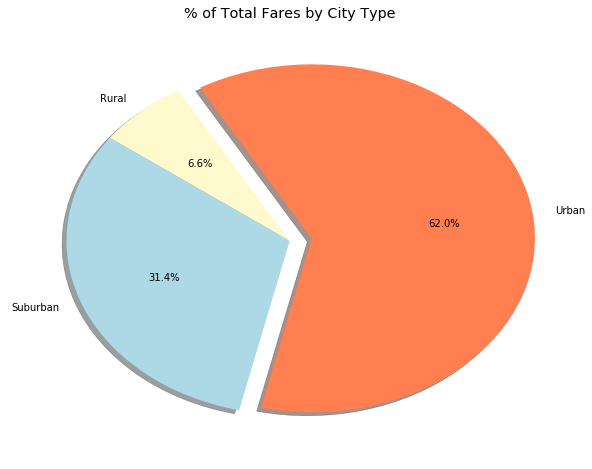

In [23]:
#Group city table by type
city_group_type = city_ride.groupby(["type"], as_index='False')

#Sum driver count, fare and ride count in city table grouped by type
city_group_type_summary = city_group_type["driver_count", "fare", "Ride Count"].sum().reset_index('type')

#Create color
colors = ["lemonchiffon", "lightblue", "coral"]
explode = [0, 0, 0.1]

#Plot pie chart for  the city table grouped by type for fare
plt.pie(city_group_type_summary["fare"], labels=city_group_type_summary["type"], colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% of Total Fares by City Type")
plt.show() 

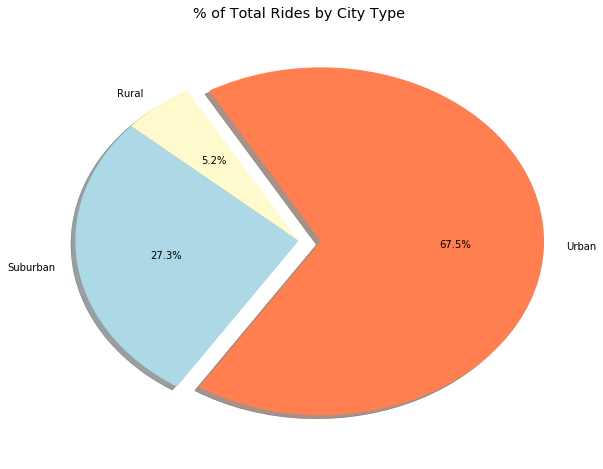

In [24]:
#Plot pie chart for the city table grouped by type for total rides
plt.pie(city_group_type_summary["Ride Count"], labels=city_group_type_summary["type"], colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% of Total Rides by City Type")
plt.show() 

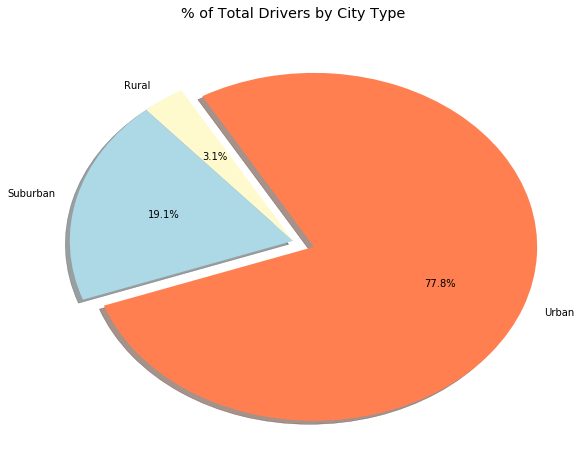

In [25]:
#Plot pie chart for the city table grouped by type for total rides
plt.pie(city_group_type_summary["driver_count"], labels=city_group_type_summary["type"], colors=colors,
        explode=explode, autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% of Total Drivers by City Type")
plt.show() 